In [2]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!pip install folium 
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

from sklearn.cluster import KMeans
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup


# Coursera Capstone - REPORT

### 1. Introduction Section :

##### 1.1 Background
I am currently residing in Dupont Circle. I enjoy venues within the neighborhood, specifically a gymn/fitness center, restaurants, and local parks. Recently, I have been offered a job in Manhattan, NY. I am somewhat concerned if I take the job, I would need to find a neighborhood that is comparable to my current residence. What better way to end this coursera journey than to use the learned skills to explore specific neighborhoods for my future that will not cause a huge culture shock.

##### 1.2 Problem:
The challenge to resolve is having the ability to search out an apartment unit in NYC that provides similar characteristics and amenities to my current scenario. Therefore, i would like to search out an apartment to the subsequent conditions:

A two to three bedroom apartment with monthly rent to not exceed US$6000/month

Similar amenities and venues of current location


##### 1.3 Targeted Audience:
Overall I believe that this study can provide a base model for those looking to move to other metropolitan areas without a complete culture shock. 

### 2. Data Section:

##### 2.1 Data of Current Situation
I presently reside within the neighborhood of Dupont Circle in Downtown DC. I will use Foursquare to spot the venues around the area of residence and show the DC map shown in the next section. This is to reference current residence to Manhattan.

##### 2.2 Data Required for Problem
In order to find an apartment in Manhattan, the subsequent information is required: 
1. Information on neighborhoods from Manhattan with their Geodata (Latitude and Longitude) 
2. Listed residences for rent in Manhattan with descriptions (bedrooms, price, location, address) 
3. Venues and amenities within Manhattan  

##### 2.3 sources and manipulation 
The list of Manhattan neighborhoods is discovered throughout the NYC clustering and neighboring exercise throughout the course. The file are going to be directly browse to the Jupiter Notebook for convenience and area savings. The cluster of neighborhoods and mapping are going to be shown, however. associate rule was accustomed confirm the geodata from Nominatim. the particular rule cryptography could also be shown in 'markdown' mode as a result of it takes time to run.

In [36]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)   
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [38]:
neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [39]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [40]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [41]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [42]:
neighborhoods.loc[neighborhoods['Borough'] == 'Manhattan']

,Borough,Neighborhood,Latitude,Longitude
6,Manhattan,Marble Hill,40.876551,-73.910660
100,Manhattan,Chinatown,40.715618,-73.994279
101,Manhattan,Washington Heights,40.851903,-73.936900
102,Manhattan,Inwood,40.867684,-73.921210
103,Manhattan,Hamilton Heights,40.823604,-73.949688
104,Manhattan,Manhattanville,40.816934,-73.957385
105,Manhattan,Central Harlem,40.815976,-73.943211
106,Manhattan,East Harlem,40.792249,-73.944182
107,Manhattan,Upper East Side,40.775639,-73.960508
108,Manhattan,Yorkville,40.775930,-73.947118


### Methodology

In [24]:
# Dupont Circle
address = '1400 20th St NW, Washington, DC 20036'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of DC home are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of DC home are 38.9089911, -77.0451481.


In [25]:
neighborhood_latitude=38.9089911
neighborhood_longitude=-77.0451481

In [26]:
CLIENT_ID = 'Q44UXP5BQ3IV4DBCPH5H1N4WFSJXLI3GDUNDJG12AN5ICU1D' # your Foursquare ID
CLIENT_SECRET = 'IXNY1VWREBZSCHL4Z4TFXUFOTXM1ZMDOSL4UGEIQOGLVTYWL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [28]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 
results = requests.get(url).json()

In [29]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
venues = results['response']['groups'][0]['items']
DCnearby_venues = json_normalize(venues) 
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
DCnearby_venues =DCnearby_venues.loc[:, filtered_columns]
DCnearby_venues['venue.categories'] = DCnearby_venues.apply(get_category_type, axis=1)
# clean columns
DCnearby_venues.columns = [col.split(".")[-1] for col in DCnearby_venues.columns]
DCnearby_venues.shape

(100, 4)

In [31]:
DCnearby_venues.head(10)

,name,categories,lat,lng
0,ChiKo,Asian Restaurant,38.909847,-77.046258
1,Dupont Circle,Park,38.909688,-77.043732
2,sweetgreen,Salad Place,38.910449,-77.044244
3,Barry's Bootcamp,Gym / Fitness Center,38.908194,-77.043412
4,Dupont Circle FRESHFARM Market,Farmers Market,38.910974,-77.044795
5,Philz Coffee,Coffee Shop,38.908399,-77.043138
6,Fantom Comics,Comic Shop,38.909406,-77.045408
7,Dupont Circle Fountain (Samuel Francis Du Pont...,Fountain,38.909677,-77.043446
8,Second Story Books,Bookstore,38.909488,-77.045102
9,Obelisk,Italian Restaurant,38.909681,-77.046242


In [32]:
latitude=38.9089911
longitude=-77.0451481
map_DC = folium.Map(location=[latitude, longitude], zoom_start=18)
for lat, lng, label in zip(DCnearby_venues['lat'], DCnearby_venues['lng'], DCnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_DC)  
    
map_DC

In [43]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [44]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [45]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [46]:
CLIENT_ID = 'Q44UXP5BQ3IV4DBCPH5H1N4WFSJXLI3GDUNDJG12AN5ICU1D' # your Foursquare ID
CLIENT_SECRET = 'IXNY1VWREBZSCHL4Z4TFXUFOTXM1ZMDOSL4UGEIQOGLVTYWL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [47]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

In [48]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [51]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee3b26b7762772fe1f7a444'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [52]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [53]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Dunkin',Donut Shop,40.877136,-73.906666


In [54]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


In [55]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [57]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [58]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3132, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [59]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,65,65,65,65,65,65
Carnegie Hill,87,87,87,87,87,87
Central Harlem,45,45,45,45,45,45
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,99,99,99,99,99,99
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


In [60]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Sk

In [61]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Sk

In [62]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.12
1          Hotel  0.06
2    Coffee Shop  0.05
3  Memorial Site  0.05
4            Gym  0.05


----Carnegie Hill----
         venue  freq
0  Coffee Shop  0.09
1         Café  0.05
2  Yoga Studio  0.03
3    Bookstore  0.03
4    Wine Shop  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1   Chinese Restaurant  0.04
2                  Bar  0.04
3  American Restaurant  0.04
4   Seafood Restaurant  0.04


----Chelsea----
            venue  freq
0     Coffee Shop  0.08
1     Art Gallery  0.07
2  Ice Cream Shop  0.04
3          Bakery  0.03
4            Café  0.03


----Chinatown----
                venue  freq
0  Chinese Restaurant  0.07
1     Bubble Tea Shop  0.04
2              Bakery  0.04
3        Cocktail Bar  0.04
4                 Bar  0.03


----Civic Center----
                 venue  freq
0          Coffee Shop  0.06
1                Hotel  0.05
2         Cocktail Bar  0.0

In [63]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [64]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Memorial Site,Gym,Coffee Shop,Playground,Food Court,Mexican Restaurant,Shopping Mall,Gourmet Shop
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Bookstore,Gym / Fitness Center,Gym,Italian Restaurant,Pizza Place,Wine Shop,Vietnamese Restaurant
2,Central Harlem,African Restaurant,Seafood Restaurant,Gym / Fitness Center,American Restaurant,Bar,French Restaurant,Chinese Restaurant,Café,Boutique,Market
3,Chelsea,Coffee Shop,Art Gallery,Ice Cream Shop,Café,American Restaurant,Bakery,Pizza Place,Cocktail Bar,Market,Seafood Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Coffee Shop,Optical Shop,Bar,Spa,American Restaurant,Ice Cream Shop


In [65]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 2, 2, 1, 1, 1, 3, 2, 2], dtype=int32)

In [66]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Pharmacy,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Deli / Bodega
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Coffee Shop,Optical Shop,Bar,Spa,American Restaurant,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Deli / Bodega,Mobile Phone Shop,Chinese Restaurant,Grocery Store,Mexican Restaurant,Bank,Spanish Restaurant,Pizza Place
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Bakery,Café,Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Mexican Restaurant,Coffee Shop,Deli / Bodega,Café,Sushi Restaurant,Bakery,Cocktail Bar,Yoga Studio,Chinese Restaurant


In [67]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [68]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Roosevelt Island,Park,Deli / Bodega,Dog Run,Coffee Shop,Greek Restaurant,Outdoors & Recreation,Monument / Landmark,Sandwich Place,Liquor Store,Dry Cleaner
28,Battery Park City,Park,Hotel,Memorial Site,Gym,Coffee Shop,Playground,Food Court,Mexican Restaurant,Shopping Mall,Gourmet Shop
37,Stuyvesant Town,Boat or Ferry,Park,Playground,Heliport,Fountain,Farmers Market,Skating Rink,Gas Station,Bistro,Bar


In [69]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Coffee Shop,Optical Shop,Bar,Spa,American Restaurant,Ice Cream Shop
14,Clinton,Theater,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Hotel,Gym,Cocktail Bar,Wine Shop,Thai Restaurant,American Restaurant
15,Midtown,Hotel,Coffee Shop,Theater,Bakery,Clothing Store,Sushi Restaurant,Japanese Restaurant,Cuban Restaurant,Pizza Place,Mediterranean Restaurant
16,Murray Hill,Hotel,Sandwich Place,Pizza Place,Japanese Restaurant,Coffee Shop,Gym / Fitness Center,Mediterranean Restaurant,Deli / Bodega,Bar,Chinese Restaurant
20,Lower East Side,Chinese Restaurant,Bakery,Café,Ramen Restaurant,Art Gallery,Coffee Shop,Cocktail Bar,Yoga Studio,Clothing Store,French Restaurant
22,Little Italy,Spa,Bubble Tea Shop,Mediterranean Restaurant,Italian Restaurant,Ice Cream Shop,Pizza Place,Bakery,Salon / Barbershop,Café,Sandwich Place
26,Morningside Heights,Park,Coffee Shop,American Restaurant,Bookstore,Burger Joint,Sandwich Place,Deli / Bodega,Donut Shop,Seafood Restaurant,Tennis Court
32,Civic Center,Coffee Shop,Hotel,Cocktail Bar,Spa,Park,American Restaurant,Gym / Fitness Center,French Restaurant,Café,Sporting Goods Shop
33,Midtown South,Korean Restaurant,Hotel,Dessert Shop,Burger Joint,Coffee Shop,Japanese Restaurant,Café,American Restaurant,Gym / Fitness Center,Hotel Bar


In [70]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Manhattanville,Coffee Shop,Seafood Restaurant,Park,Bakery,Mexican Restaurant,Chinese Restaurant,Deli / Bodega,Italian Restaurant,Sushi Restaurant,Cosmetics Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,Gym / Fitness Center,American Restaurant,Bar,French Restaurant,Chinese Restaurant,Café,Boutique,Market
8,Upper East Side,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Bakery,Yoga Studio,French Restaurant,Spa,American Restaurant,Juice Bar,Pizza Place
9,Yorkville,Coffee Shop,Gym,Italian Restaurant,Bar,Sushi Restaurant,Pizza Place,Deli / Bodega,Mexican Restaurant,Wine Shop,Japanese Restaurant
10,Lenox Hill,Coffee Shop,Pizza Place,Italian Restaurant,Sushi Restaurant,Café,Cocktail Bar,Gym / Fitness Center,Gym,Burger Joint,Art Gallery
12,Upper West Side,Bar,Italian Restaurant,Dessert Shop,Wine Bar,Indian Restaurant,Middle Eastern Restaurant,Bagel Shop,Thai Restaurant,Mexican Restaurant,Mediterranean Restaurant
13,Lincoln Square,Plaza,Italian Restaurant,Café,Gym / Fitness Center,Theater,Performing Arts Venue,Concert Hall,Wine Shop,French Restaurant,Indie Movie Theater
17,Chelsea,Coffee Shop,Art Gallery,Ice Cream Shop,Café,American Restaurant,Bakery,Pizza Place,Cocktail Bar,Market,Seafood Restaurant
18,Greenwich Village,Italian Restaurant,Café,Sushi Restaurant,Burger Joint,Spa,Comedy Club,Dessert Shop,Pizza Place,Coffee Shop,Clothing Store
19,East Village,Mexican Restaurant,Bar,Coffee Shop,Cocktail Bar,Speakeasy,Ice Cream Shop,Juice Bar,Pizza Place,Wine Bar,Seafood Restaurant


In [71]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Deli / Bodega,Mobile Phone Shop,Chinese Restaurant,Grocery Store,Mexican Restaurant,Bank,Spanish Restaurant,Pizza Place
3,Inwood,Mexican Restaurant,Lounge,Bakery,Café,Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant
4,Hamilton Heights,Pizza Place,Mexican Restaurant,Coffee Shop,Deli / Bodega,Café,Sushi Restaurant,Bakery,Cocktail Bar,Yoga Studio,Chinese Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Sandwich Place,Latin American Restaurant,Pizza Place,French Restaurant,Beer Bar,Pharmacy
36,Tudor City,Café,Park,Mexican Restaurant,Pizza Place,Sushi Restaurant,Deli / Bodega,Greek Restaurant,Thai Restaurant,Dog Run,Seafood Restaurant


In [72]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Gym,Coffee Shop,Yoga Studio,Pharmacy,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Deli / Bodega


In [74]:
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Manhattanville,Coffee Shop,Seafood Restaurant,Park,Bakery,Mexican Restaurant,Chinese Restaurant,Deli / Bodega,Italian Restaurant,Sushi Restaurant,Cosmetics Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,Gym / Fitness Center,American Restaurant,Bar,French Restaurant,Chinese Restaurant,Café,Boutique,Market
8,Upper East Side,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Bakery,Yoga Studio,French Restaurant,Spa,American Restaurant,Juice Bar,Pizza Place
9,Yorkville,Coffee Shop,Gym,Italian Restaurant,Bar,Sushi Restaurant,Pizza Place,Deli / Bodega,Mexican Restaurant,Wine Shop,Japanese Restaurant
10,Lenox Hill,Coffee Shop,Pizza Place,Italian Restaurant,Sushi Restaurant,Café,Cocktail Bar,Gym / Fitness Center,Gym,Burger Joint,Art Gallery
12,Upper West Side,Bar,Italian Restaurant,Dessert Shop,Wine Bar,Indian Restaurant,Middle Eastern Restaurant,Bagel Shop,Thai Restaurant,Mexican Restaurant,Mediterranean Restaurant
13,Lincoln Square,Plaza,Italian Restaurant,Café,Gym / Fitness Center,Theater,Performing Arts Venue,Concert Hall,Wine Shop,French Restaurant,Indie Movie Theater
17,Chelsea,Coffee Shop,Art Gallery,Ice Cream Shop,Café,American Restaurant,Bakery,Pizza Place,Cocktail Bar,Market,Seafood Restaurant
18,Greenwich Village,Italian Restaurant,Café,Sushi Restaurant,Burger Joint,Spa,Comedy Club,Dessert Shop,Pizza Place,Coffee Shop,Clothing Store
19,East Village,Mexican Restaurant,Bar,Coffee Shop,Cocktail Bar,Speakeasy,Ice Cream Shop,Juice Bar,Pizza Place,Wine Bar,Seafood Restaurant


In [76]:
# The code was removed by Watson Studio for sharing.

In [77]:
mhrent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


In [78]:
mhrent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,NaN,NaN


In [82]:
for n in range(len(mhrent)):
    address= mhrent['Address'][n] 
    address=(mhrent['Address'][n]+ ' , '+' Manhattan NY ') 
    geolocator = Nominatim() 
    location = geolocator.geocode(address) 
    latitude = location.latitude 
    longitude = location.longitude 
    mhrent['Lat'][n]=latitude 
    mhrent['Long'][n]=longitude
#print(n,latitude,longitude)
time.sleep(2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [84]:
# The code was removed by Watson Studio for sharing.

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,40.744118,-73.995299


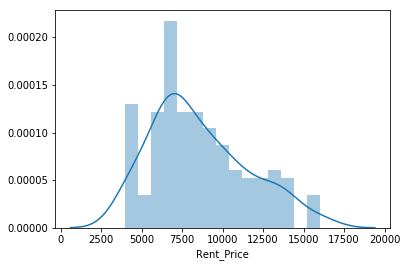

In [85]:
import seaborn as sns
sns.distplot(manhattanrent['Rent_Price'],bins=15)

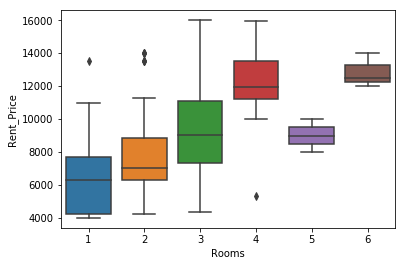

In [86]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=manhattanrent)

In [89]:
latitude= 40.7308619
longitude= -73.9871558

map_manhattanrent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(manhattanrent['Lat'], manhattanrent['Long'],'$ ' + manhattanrent['Rent_Price'].astype(str)+ ',  '+ manhattanrent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattanrent) 
    

map_manhattanrent

In [96]:
latitude= 40.7308619
longitude= -73.9871558

kclusters=5
Cluster_map = folium.Map(location=[latitude, longitude], zoom_start=13)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

for lat, lng, label in zip(manhattanrent['Lat'], manhattanrent['Long'],'$ ' + manhattanrent['Rent_Price'].astype(str)+ manhattanrent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Cluster_map)  
    
from folium.plugins import MeasureControl
map_manhattanrent.add_child(MeasureControl())
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattanrent)

Cluster_map

In [97]:
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Deli / Bodega,Mobile Phone Shop,Chinese Restaurant,Grocery Store,Mexican Restaurant,Bank,Spanish Restaurant,Pizza Place
3,Inwood,Mexican Restaurant,Lounge,Bakery,Café,Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant,Caribbean Restaurant,Chinese Restaurant
4,Hamilton Heights,Pizza Place,Mexican Restaurant,Coffee Shop,Deli / Bodega,Café,Sushi Restaurant,Bakery,Cocktail Bar,Yoga Studio,Chinese Restaurant
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Sandwich Place,Latin American Restaurant,Pizza Place,French Restaurant,Beer Bar,Pharmacy
36,Tudor City,Café,Park,Mexican Restaurant,Pizza Place,Sushi Restaurant,Deli / Bodega,Greek Restaurant,Thai Restaurant,Dog Run,Seafood Restaurant


In [103]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(manhattanrent['Lat'], manhattanrent['Long'],'$ ' + manhattanrent['Rent_Price'].astype(str)+ ', '+manhattanrent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh) 

kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh)

# Adds tool to the top right
from folium.plugins import MeasureControl
map_mh.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh)

map_mh   

To narrow down the search, I've chosen to explore two specific units that fit my specifications:

1. West 23rd St, $4250 rent, in Flatiron Cluster 2

2. 52 Spring St, $6000 rent, in Little Italy Cluster 1

In [100]:
#Look at the first apartment's area and venues
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Manhattanville,Coffee Shop,Seafood Restaurant,Park,Bakery,Mexican Restaurant,Chinese Restaurant,Deli / Bodega,Italian Restaurant,Sushi Restaurant,Cosmetics Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,Gym / Fitness Center,American Restaurant,Bar,French Restaurant,Chinese Restaurant,Café,Boutique,Market
8,Upper East Side,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Bakery,Yoga Studio,French Restaurant,Spa,American Restaurant,Juice Bar,Pizza Place
9,Yorkville,Coffee Shop,Gym,Italian Restaurant,Bar,Sushi Restaurant,Pizza Place,Deli / Bodega,Mexican Restaurant,Wine Shop,Japanese Restaurant
10,Lenox Hill,Coffee Shop,Pizza Place,Italian Restaurant,Sushi Restaurant,Café,Cocktail Bar,Gym / Fitness Center,Gym,Burger Joint,Art Gallery
12,Upper West Side,Bar,Italian Restaurant,Dessert Shop,Wine Bar,Indian Restaurant,Middle Eastern Restaurant,Bagel Shop,Thai Restaurant,Mexican Restaurant,Mediterranean Restaurant
13,Lincoln Square,Plaza,Italian Restaurant,Café,Gym / Fitness Center,Theater,Performing Arts Venue,Concert Hall,Wine Shop,French Restaurant,Indie Movie Theater
17,Chelsea,Coffee Shop,Art Gallery,Ice Cream Shop,Café,American Restaurant,Bakery,Pizza Place,Cocktail Bar,Market,Seafood Restaurant
18,Greenwich Village,Italian Restaurant,Café,Sushi Restaurant,Burger Joint,Spa,Comedy Club,Dessert Shop,Pizza Place,Coffee Shop,Clothing Store
19,East Village,Mexican Restaurant,Bar,Coffee Shop,Cocktail Bar,Speakeasy,Ice Cream Shop,Juice Bar,Pizza Place,Wine Bar,Seafood Restaurant


In [102]:
#Look at the second apartment's area and venues
kk = 1
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Bubble Tea Shop,Coffee Shop,Optical Shop,Bar,Spa,American Restaurant,Ice Cream Shop
14,Clinton,Theater,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Hotel,Gym,Cocktail Bar,Wine Shop,Thai Restaurant,American Restaurant
15,Midtown,Hotel,Coffee Shop,Theater,Bakery,Clothing Store,Sushi Restaurant,Japanese Restaurant,Cuban Restaurant,Pizza Place,Mediterranean Restaurant
16,Murray Hill,Hotel,Sandwich Place,Pizza Place,Japanese Restaurant,Coffee Shop,Gym / Fitness Center,Mediterranean Restaurant,Deli / Bodega,Bar,Chinese Restaurant
20,Lower East Side,Chinese Restaurant,Bakery,Café,Ramen Restaurant,Art Gallery,Coffee Shop,Cocktail Bar,Yoga Studio,Clothing Store,French Restaurant
22,Little Italy,Spa,Bubble Tea Shop,Mediterranean Restaurant,Italian Restaurant,Ice Cream Shop,Pizza Place,Bakery,Salon / Barbershop,Café,Sandwich Place
26,Morningside Heights,Park,Coffee Shop,American Restaurant,Bookstore,Burger Joint,Sandwich Place,Deli / Bodega,Donut Shop,Seafood Restaurant,Tennis Court
32,Civic Center,Coffee Shop,Hotel,Cocktail Bar,Spa,Park,American Restaurant,Gym / Fitness Center,French Restaurant,Café,Sporting Goods Shop
33,Midtown South,Korean Restaurant,Hotel,Dessert Shop,Burger Joint,Coffee Shop,Japanese Restaurant,Café,American Restaurant,Gym / Fitness Center,Hotel Bar


#### Discussion

##### Selecting apartment

Apartment 1: West 23rd St, Flatiron. The rent cost is $4250, which is perfectly in the range that I had specified. My future office is located in Chelsea which is in walking distance from this location. Venues for this apt are as of Cluster 2. The top venues in this neighborhood that coincide with my interests are gyms, medditeranean restaurants, italian food, and parks.  

Apartment 2: 52 Spring St,Little Italy. The rent cost is $6000, which is at the cap of my specified range. This apartment is not located close to the future office, would have to take a subway or taxi.Venues for this apt are as of Cluster 3. The top venues in this neighborhood that coincide with my interests are food places (i.e. italian restaurants, bubble tea, etc), which is great regarding convenience to location and my interests in cuisine. 

Based on my current, I feel that Cluster 2 type of venues is a closer resemblance to my current environment in Dupont Circle. I strongly weigh proximity to parks, gyms, and food very highly in my selection, thus apartment 1 located in Flatiron District is a better choice since rent amount and nearby venues matches my preferences.

#### Conclusion

In this study, I analyzed the relationships between Manhattan neighborhoods, venues around the neighborhoods, and rent costs to create a recommendation for a future living arrangement that is similar to current residence in a different city. Throughout the study, I leveraged web data, python's built-in visualization tools, and the Foursquare API tools. As simple as the variables were used in the project, it provides a very straightforward method to creating a recommendation.

In general, following the content and labs during the Capstone Course has been extremely useful in learning the field of Data Science. I have created a process that could be replicated for anyone who is looking to move from one metropolitan city to another.
